In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import math
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

<ipython-input-1-98e010612c42>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [6]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [7]:
  wine_quality_white = pd.read_csv("winequality-white.csv")

###Step 1: Understanding Our Data

First we need to load in our dataset using the read_csv function in pandas

Next, we will want to inspect our data and understand which fields are included. Looking at this data, what should our target variable be? Any ideas?

In [8]:
wine_quality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Now, we'll want to see if there are any N/As in the dataset

In [9]:
wine_quality_white.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [10]:
wine_quality_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Below, we will inspect our dataset to see what kinds of values are provided for each column.

In [11]:
wine_quality_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


It might be visually easier for us to see the values using a histogram

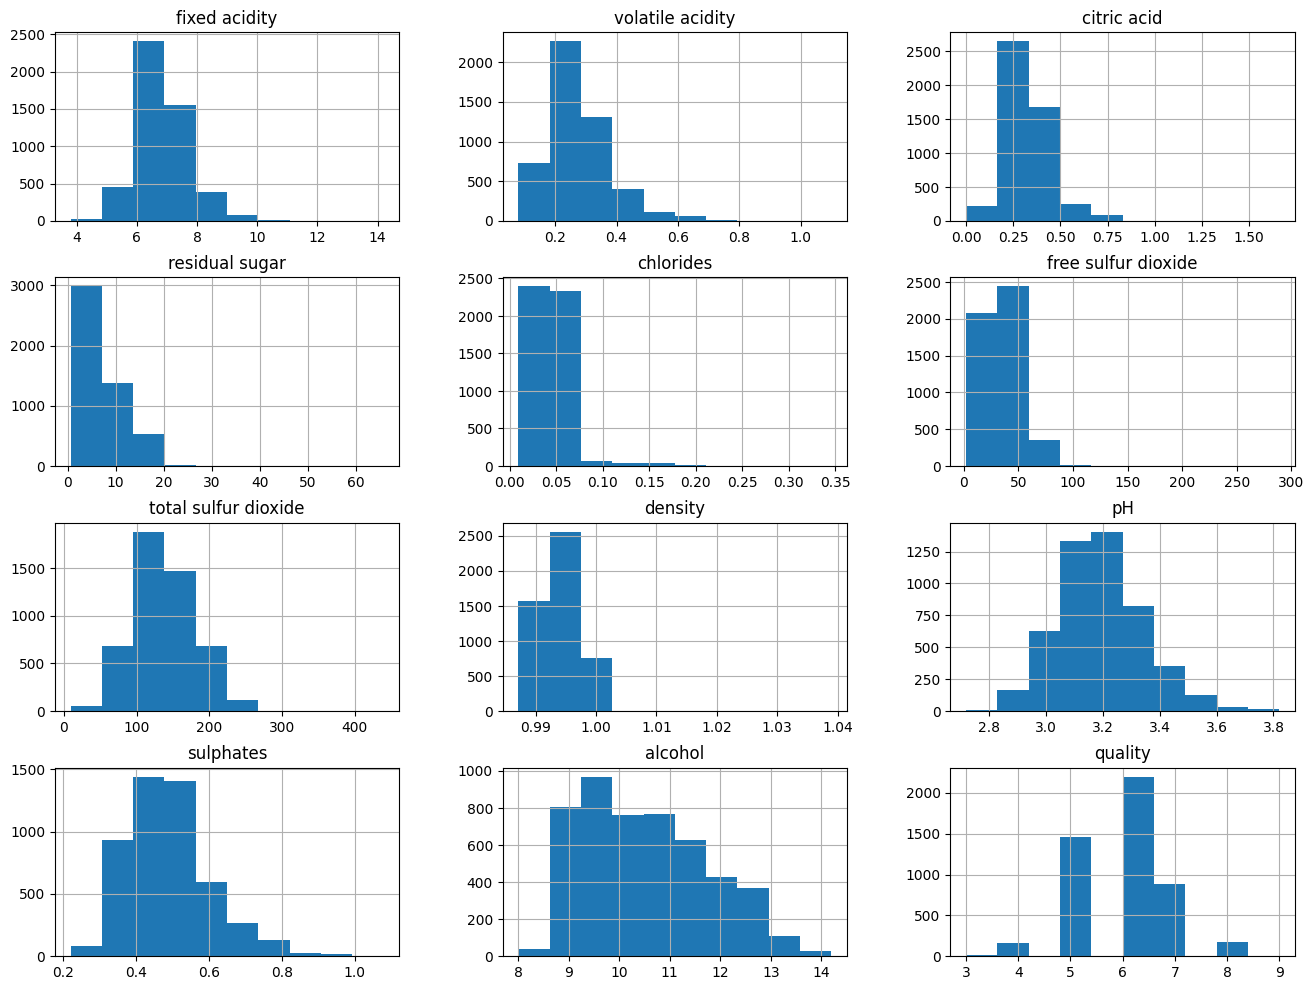

In [12]:
plt.rcParams['figure.figsize'] = 16, 12
wine_quality_white.hist()
plt.show()

Do any of the values look strange?
Which feature do you think is most likely to be useful in our wine analysis?

Now, we want to see what the relationships between different variables are. This is an important step for us to understand which variables might be very correlated with each other. If the variables seem extremely correlated, we may choose to drop one of the variables from the model to ensure we still have good predictive power.

In [13]:
correlations = wine_quality_white.corr()
correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


It's a bit hard to see in table format, so we are going to go ahead and look at a correlation matrix

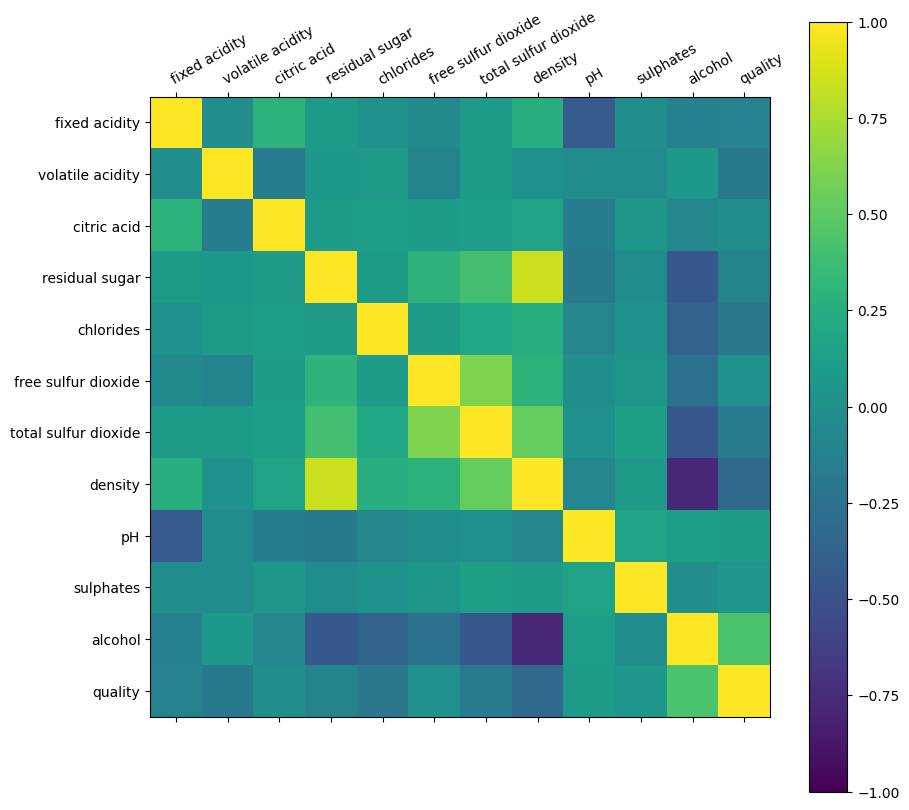

In [14]:
	plt.rcParams['figure.figsize'] = 10, 10
	names = correlations.columns
	fig = plt.figure()
	ax = fig.add_subplot(111)
	cax = ax.matshow(correlations, vmin=-1, vmax=1)
	fig.colorbar(cax)
	ticks = np.arange(0,len(names),1)
	ax.set_xticks(ticks)
	ax.set_yticks(ticks)
	ax.set_xticklabels(names, rotation=30, rotation_mode='anchor', ha='left')
	ax.set_yticklabels(names)
	plt.show()

Now,we might want to understand the relative outliers still present in our data.

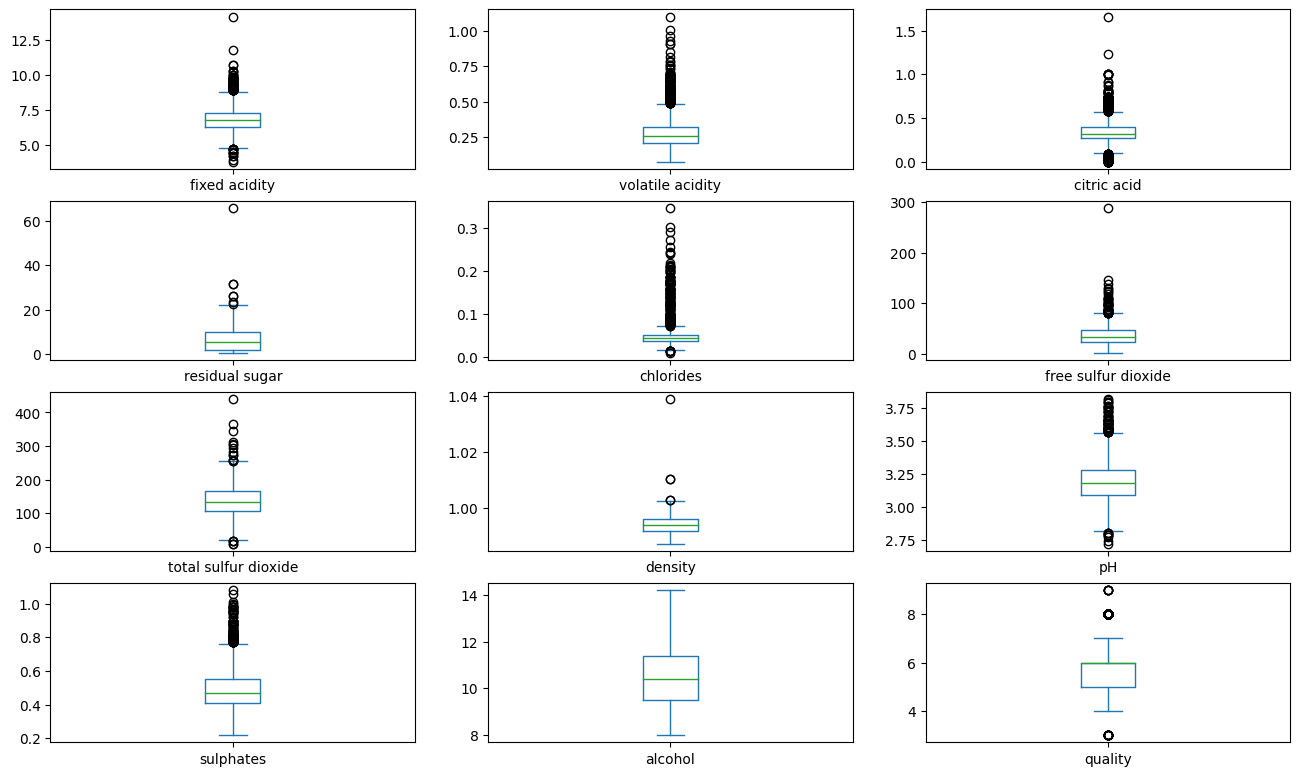

In [15]:
	plt.rcParams['figure.figsize'] = 16, 12
	wine_quality_white.plot(kind='box', subplots=True,
	layout=(5, math.ceil(len(wine_quality_white.columns)/5)),
	sharex=False, sharey=False)
	plt.show()

Now that we understand our data, we want to take some additional steps to pre-process our data before putting it into the model.

In [21]:
processed_df = wine_quality_white.copy(deep=True)
#processed_df = processed_df.fillna(processed_df.median())

In [22]:
processed_df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

If we look at our dataset again now, we can see what the distribution of the dataset is after we did the preprocessing step.

We might also want to know what variable types each of the variables in the dataset, and convert them if need be.

In [23]:
processed_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Looking at the above, we see that most of these are floats, except for quality which is an integer. Because we will be doing a binary classifier model, we need to make a binary target variable.

In [24]:
processed_df['quality_binary'] = processed_df['quality'].apply(lambda x: 1 if x < 5 else 0)

In [25]:
processed_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_binary            int64
dtype: object

In [26]:
processed_df['quality_binary'].value_counts()

quality_binary
0    4715
1     183
Name: count, dtype: int64

###Step 2: Putting together our model!

First, we need to decide which features to include in our model. Depending on which model we use, we may need to complete additional pre-processing steps. In today's class, we will be fitting a simple logistic regression model, which accepts continuous variables, so we do not need to do much extra work to pre-process the data.

Let's come back to the same question again: What is our x variable? What is our y variable?

In [27]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
selected_y = 'quality_binary'

In [28]:
x = processed_df[selected_features]
y = processed_df[selected_y]

In [29]:
x.shape

(4898, 11)

In [30]:
y.shape

(4898,)

For the purposes of evaluating our model at a later date, we need to split our dataset into training data and testing data. We will use the sklearn function modules for this. In some cases, you may also want to split into 3 datasets (train, validation, and test). For simplicity, I won't do that now but we will cover this more when we discuss model evaluation next time.

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1, shuffle=False)

Below, I check the size of the test data (the number of rows). This is relevant later on when we think about evaluation.

In [32]:
y_test.shape #roughly 20%

(980,)

In [33]:
y_train.shape #roughly 80%

(3918,)

#### Time to train a logistic regression model!



In [36]:
clf_log = LogisticRegression(C=0.1, max_iter=500)
clf_log = clf_log.fit(X_train, y_train)

In [37]:
print(clf_log)

LogisticRegression(C=0.1, max_iter=500)


Now that our model is trained, we will want to apply our model to the test set (which the model has never seen before). Using the testing data, we will try to create a vector of predicted y values, for each of the x_test values.

In [38]:
y_pred = clf_log.predict(X_test)

In [39]:
y_pred.shape

(980,)

In [40]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
y_test

3918    0
3919    0
3920    0
3921    0
3922    0
       ..
4893    0
4894    0
4895    0
4896    0
4897    0
Name: quality_binary, Length: 980, dtype: int64

Now we can use a built-in sklearn function to get our accuracy score for the model.

In [42]:
metrics.accuracy_score(y_test, y_pred) #MSE

0.9734693877551021

In [51]:
accuracy_scores = metrics.accuracy_score(y_test, y_pred)

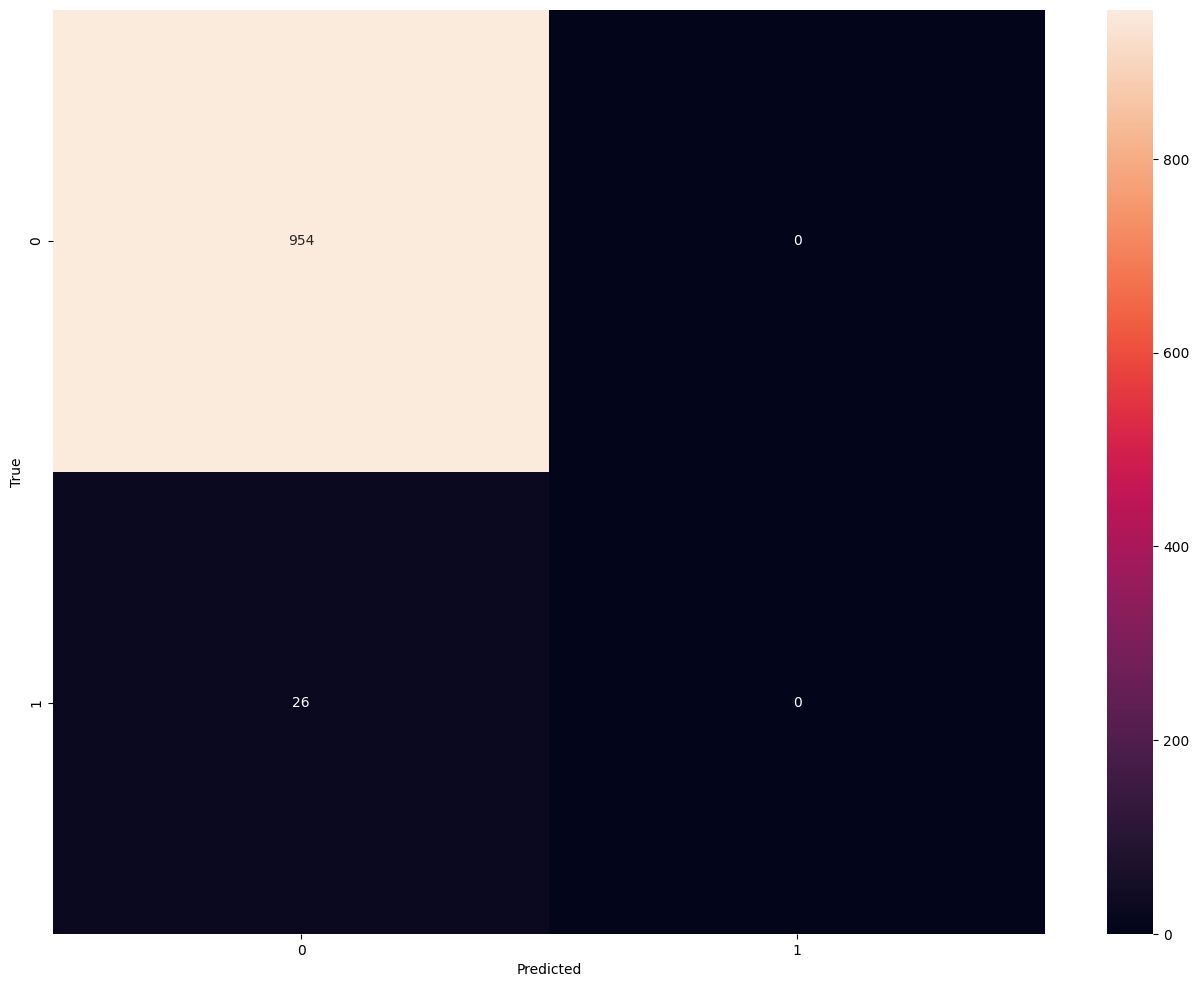

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your test labels and predictions, respectively
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get probability estimates
y_pred_prob = clf.predict_proba(X_test)

# y_pred_prob is a Numpy array with shape (n_samples, n_classes)
# where each column represents the probability of the respective class


In [55]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob) # y_pred_prob is the probability estimates of the positive class

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


ValueError: y should be a 1d array, got an array of shape (980, 2) instead.

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


NameError: name 'y_pred_prob' is not defined

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       0.00      0.00      0.00        26

    accuracy                           0.97       980
   macro avg       0.49      0.50      0.49       980
weighted avg       0.95      0.97      0.96       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


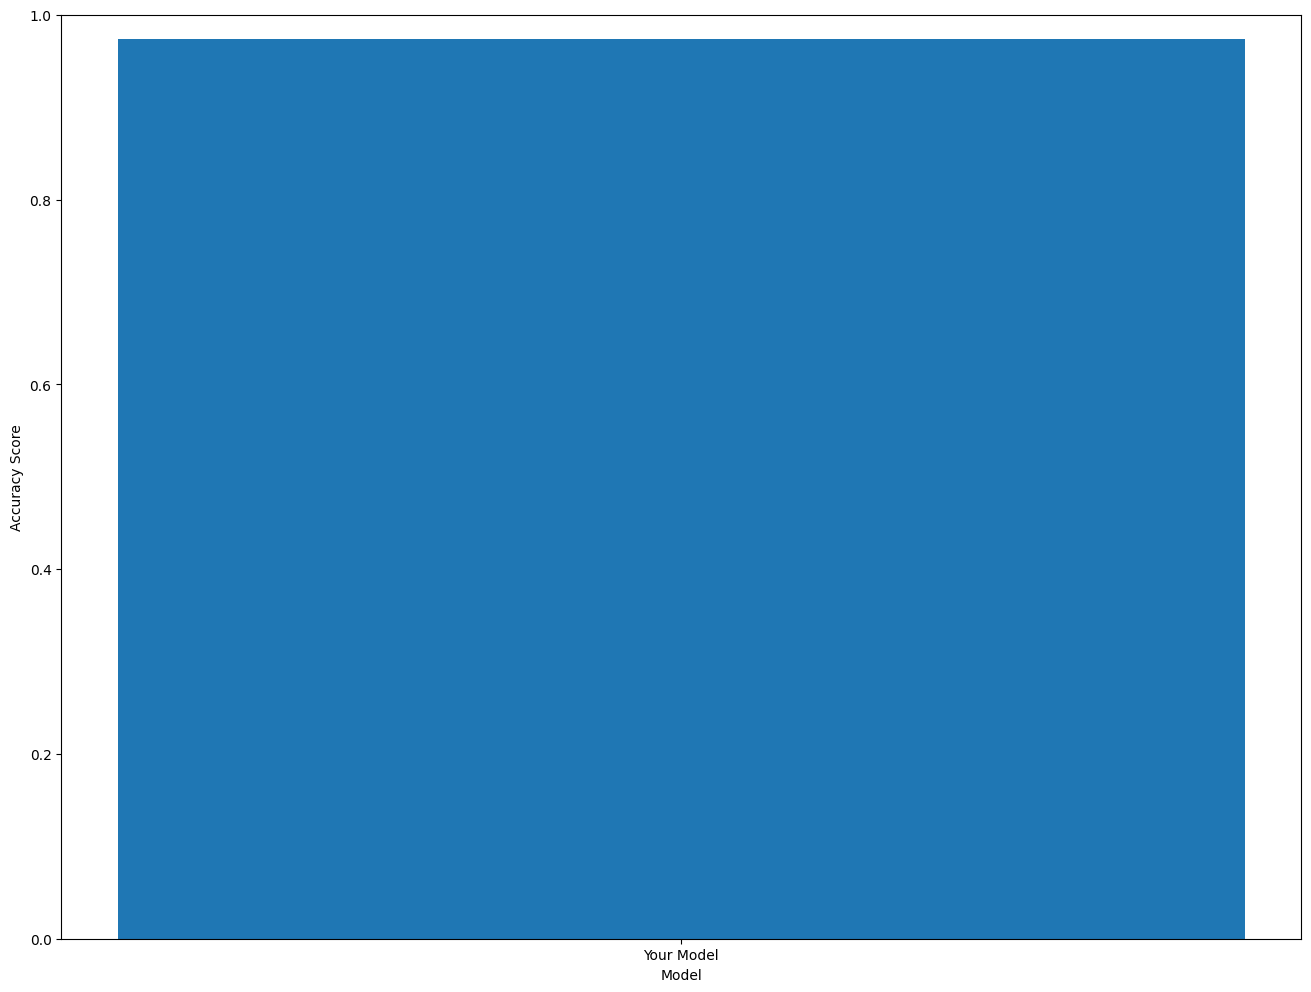

In [53]:
import matplotlib.pyplot as plt

# Assuming accuracy_score is a variable holding the accuracy score
accuracy_scores = metrics.accuracy_score(y_test, y_pred) # Add more scores for comparison
model_names = ['Your Model'] # Add more model names for comparison

plt.bar(model_names, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) # Accuracy ranges between 0 and 1
plt.show()
